## Produkcja kukurydzy - optymalizacja kosztów

Naszym klientem jest małe gospodarstwo rolne specjalizujące się w produkcji kukurydzy. Naszym zadaniem jest wykonanie symulacji w celu oszacowania najlepszego poziomu wydatków (np. paliwo, nawozy, sprzęt) przy określonej produkcji.

Zmiennymi w tym przypadku są:
1. **Poziom wydatków** oraz **opady deszczu** wpływają na **produkcję**
2. **Produkcja**, **cena kukurydzy**, **popyt** wpływają na **rentowność** gospodarstwa

Przyjmujemy, że opady deszczu mają rozkład normalny o średniej 50 i odchyleniu standardowym 15. 
Średnia produkcja kokurydzy jest dana równaniem:

\begin{align*}
100 * cost^{0.1} * rain^{0.2}
\end{align*}

Natomiast kukurydza wyprodukowana w dowolnym sezonie jest opisana rozkładem Poissona.


Jako gospodarstwo, zwykle nie mamy kontroli nad popytem i ceną. Przyjmujemy, że cena jest dana rozkładem normalnym o średniej 40 i odchyleniem 10. Popyt jest dany specjalną funkcją.

W celu optymalizacji kosztów produkcji, naszym celem jest znaleźć maksymalny średni zysk. Tak jak wspominaliśmy wcześniej, my kontrolujemy tylko wydatki. Dlatego wykonujemy wiele symulacji pozostałych czynników w zależności od poziomu wydatków. Dla każdego wybranego poziomu obliczamy średni wynik z przeprowadzonych symulacji i go zapisujemy. Następnie wybieramy ten poziom wydatków, dla którego zysk jest najwyższy.

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def poziom_produkcji(deszcz, koszt):
    srednia_produkcja = 100*koszt**0.1*deszcz**0.2
    produkcja = np.random.poisson(srednia_produkcja)
    return produkcja

def poziom_popytu(cena):
    srednia_produkcja = 1000 - 8*cena
    popyt = np.random.poisson(srednia_produkcja)
    return popyt

def poziom_zysku(koszt):
    cena = np.random.normal(40, 10)
    deszcz = np.random.normal(50, 15)
    podaz = poziom_produkcji(deszcz, koszt)
    popyt = poziom_popytu(cena)
    brak_nadwyzki = podaz <= popyt
    if brak_nadwyzki == True:
        zysk = cena*podaz - koszt
        return zysk
    else:
        zysk = cena*popyt - koszt
        return zysk

C:\Users\mikolaj.jaworski\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys


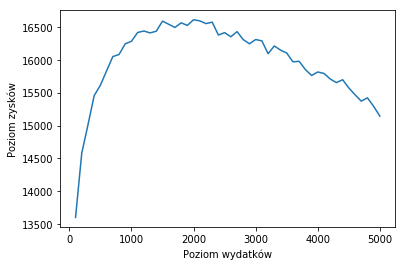

Dla kosztów na poziomie: 2000 zysk będzie wynosił: 16606.07016660892


In [34]:
symulacje, wyniki = 10000, {}
poziomy_kosztow = np.arange(100, 5100, 100)

for koszt in poziomy_kosztow:
    zyski = []
    for i in range(symulacje):
        x = poziom_zysku(koszt)
        zyski.append(x)
    wyniki[koszt] = np.mean(zyski)
    

plt.plot(wyniki.keys(), wyniki.values())
plt.xlabel('Poziom wydatków')
plt.ylabel('Poziom zysków')
plt.show()

print("Dla kosztów na poziomie " +
      str([x for x in wyniki.keys() if wyniki[x] == max(wyniki.values())][0]) +
      " zysk będzie wynosił: " +
      str(max(wyniki.values())))